<a href="https://colab.research.google.com/github/armgham/university-homeworks-projecs/blob/data-mining/950122680007_Ghamgossar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the DS

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Pet_Supplies.json.gz

--2020-07-19 05:40:03--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Pet_Supplies.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 901468015 (860M) [application/octet-stream]
Saving to: ‘Pet_Supplies.json.gz’

Pet_Supplies.json.g 100%[===================>] 859.71M  21.8MB/s    in 42s     

2020-07-19 05:40:45 (20.7 MB/s) - ‘Pet_Supplies.json.gz’ saved [901468015/901468015]



In [ ]:
%%time
import gzip, json
import pandas as pd

data_new = []
with gzip.open('Pet_Supplies.json.gz') as f:
    print('opening file')
    i = 0
    for l in f:
        jsn = json.loads(l.strip())

        data_new.append(jsn)
        i += 1
        if i > 50000:
            break
df = pd.DataFrame.from_dict(data_new)

opening file
CPU times: user 891 ms, sys: 81.1 ms, total: 972 ms
Wall time: 984 ms


In [ ]:
print(df.shape)
df.head(5)

(50001, 12)


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3.0,5,True,"09 27, 2007",A13K4OZKAAHOXS,0972585419,100indecisions,"Either my bird can't talk, or it really doesnt...",Still waiting for it to work...,1190851200,NaN,NaN
1,4.0,6,True,"08 25, 2007",A1DWYEX4P7GB7Z,0972585419,J. Weaver,The CD is a good idea for teaching a bird to s...,Feathered Phonics volume 1,1188000000,NaN,NaN
2,4.0,5,True,"02 20, 2007",A3NVN97YJSKEPC,0972585419,Theresa Ehrhardt,good cd to teach birds to talk and learn new w...,bird cd,1171929600,NaN,NaN
3,1.0,NaN,True,"12 30, 2016",A1PDMES1LYA0DP,0972585419,Kathi,I was not happy with product would like to ret...,One Star,1483056000,NaN,NaN
4,1.0,NaN,True,"12 23, 2016",AT6BH0TQLZS5X,0972585419,Alyssa,This cd is scratched and it constantly skips. ...,One Star,1482451200,NaN,NaN


,null,percent
image,49006,98.010
vote,45066,90.130
style,16198,32.395
reviewText,14,0.028
summary,11,0.022
reviewerName,5,0.010
overall,0,0.000
verified,0,0.000
reviewTime,0,0.000
reviewerID,0,0.000


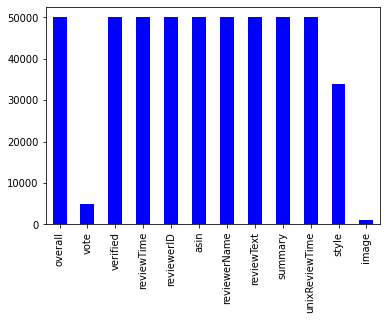

In [ ]:
df.count().plot(kind='bar', color='blue')
null_values = df.isna().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
sum_tot = len(df)
null_values['percent'] = null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)


# Data Pre-processing

In [ ]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')

stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
neg_stop = ['no', 'nor', 'not', "don't", "aren't", "couldn't", "didn't", "doesn't",
            "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't",
            "shan't", "shouldn't", "wasn't", "weren't", "won't", "wouldn't"]
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}
stop = [stp for stp in stopwords.words('english') if stp not in neg_stop]

In [ ]:
df_new = df[['reviewText','overall']]
df_new = df_new.dropna()
df_new.shape

(49987, 2)

In [ ]:
import re
import string

def clean_text(text):
    '''lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = " ".join(x for x in text.split() if x not in stop)
    text = text.lower()

    text = " ".join([x for x in text.split()])
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    text = " ".join(new_text)


    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

pre_process_text = lambda x: clean_text(x)

%time df_new['reviewText'] = df_new.reviewText.apply(pre_process_text)
df_new.reviewText

CPU times: user 5.3 s, sys: 9.97 ms, total: 5.31 s
Wall time: 5.32 s


0        either bird cannot talk really doesnt want say...
1        the cd good idea teaching bird speakbut words ...
2        good cd teach birds talk learn new words keeps...
3           i not happy product would like return not work
4          this cd scratched constantly skips disappointed
                               ...                        
49996    these snacks dogs favorite they look good pick...
49997                           great price dogs love them
49998    my dog loves these he chihuahua right size tre...
49999    my lily loves mini just veggn treats i recentl...
50000    my doberman maltipoo love these wish small lar...
Name: reviewText, Length: 49987, dtype: object

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new['reviewText'], 
                                                   df_new['overall'],
                                                   test_size=.25, random_state=1)

length of train data: 37490


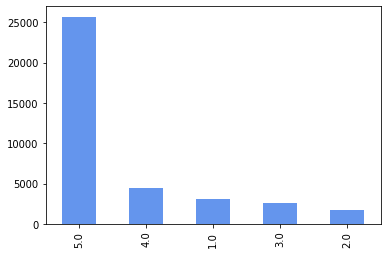

In [ ]:
print("length of train data:", len(X_train))
y_train.value_counts().plot(kind='bar', color='cornflowerblue')

length of test data: 12497


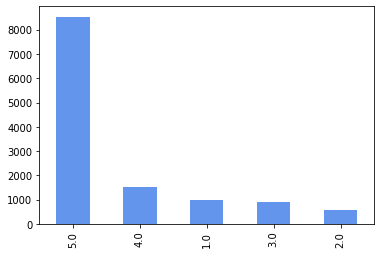

In [ ]:
print("length of test data:", len(X_test))
y_test.value_counts().plot(kind='bar', color='cornflowerblue')

# Word Embedding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
%time tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

CPU times: user 849 ms, sys: 17.8 ms, total: 866 ms
Wall time: 883 ms


# Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm


In [ ]:
clf1 = MultinomialNB()
clf2 = svm.SVC()
clf3 = LogisticRegression()

In [ ]:
%time clf1.fit(tfidf_train, y_train)

CPU times: user 32.7 ms, sys: 1.04 ms, total: 33.8 ms
Wall time: 39.2 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
%time clf2.fit(tfidf_train, y_train)

CPU times: user 14min 8s, sys: 769 ms, total: 14min 9s
Wall time: 14min 9s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
%time clf3.fit(tfidf_train, y_train)

CPU times: user 8.1 s, sys: 5.59 s, total: 13.7 s
Wall time: 7.07 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
%time predicted1 = clf1.predict(tfidf_test)
%time predicted2 = clf2.predict(tfidf_test)
%time predicted3 = clf3.predict(tfidf_test)

CPU times: user 6.07 ms, sys: 0 ns, total: 6.07 ms
Wall time: 6.82 ms
CPU times: user 1min 6s, sys: 7.96 ms, total: 1min 6s
Wall time: 1min 6s
CPU times: user 4.95 ms, sys: 0 ns, total: 4.95 ms
Wall time: 4.39 ms


In [ ]:
f1_score_clf1 = f1_score(predicted1, y_test, average='micro')
print("f1 score of model1:", f1_score_clf1)
confusion_matrix(y_test, predicted1)

f1 score of model1: 0.6830439305433303


array([[   5,    0,    0,    0,  969],
       [   1,    0,    0,    0,  562],
       [   0,    0,    1,    0,  908],
       [   0,    0,    0,    1, 1521],
       [   0,    0,    0,    0, 8529]])

In [ ]:
f1_score_clf2 = f1_score(predicted2, y_test, average='micro')
print("f1 score of model2:", f1_score_clf2)
confusion_matrix(y_test, predicted2)

f1 score of model2: 0.7394574697927503


array([[ 562,    6,   35,    3,  368],
       [ 177,   22,   66,   13,  285],
       [ 100,    6,  132,   38,  633],
       [  35,    2,   31,   97, 1357],
       [  58,    2,   17,   24, 8428]])

In [ ]:
f1_score_clf3 = f1_score(predicted3, y_test, average='micro')
print("f1 score of model3:", f1_score_clf3)
confusion_matrix(y_test, predicted3)

f1 score of model3: 0.7387372969512682


array([[ 556,   35,   46,   23,  314],
       [ 166,   32,   89,   49,  227],
       [ 103,   22,  150,  126,  508],
       [  33,    6,   79,  216, 1188],
       [  66,    4,   52,  129, 8278]])

# Model Illustration

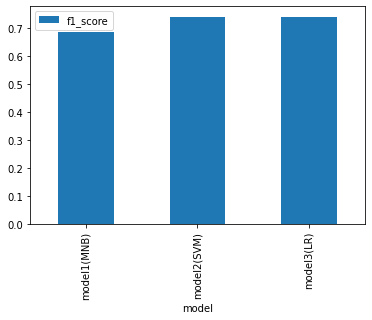

In [ ]:
r1 = {'model': 'model1(MNB)', 'f1_score': f1_score_clf1}
r2 = {'model': 'model2(SVM)', 'f1_score': f1_score_clf2}
r3 = {'model': 'model3(LR)', 'f1_score': f1_score_clf3}
results = [r1, r2, r3]
results_df = pd.DataFrame.from_dict(results)

results_df.plot(kind='bar',x='model',y='f1_score')

# BERT LogisticRegression

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 778kB 10.5MB/s 
     |████████████████████████████████| 1.1MB 18.3MB/s 
     |████████████████████████████████| 3.0MB 41.0MB/s 
     |████████████████████████████████| 890kB 40.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.0-cp36-none-any.whl size=86756 sha256=e7f5c0b2d7d3ff4c5e7935e646d699d7f73588ccbffb3124391d77063b8297de
  Stored in directory: /root/.cache/pip/wheels/b8/23/85/85d6a9a6c68f0625a1ecdaad903bb0a78df058c10cf74f9de4
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=64812db9966afd1d24843312d4a4c34ec62c49a6fb6fa0a3776244ddab3bb00c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import logging



model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:08<00:00, 49.6MB/s]


In [ ]:
l_x_train = list(X_train)
#print('1')
%time new_x_train_bert_sentencetransform = model.encode(l_x_train)
#print('2')
l_x_test = list(X_test)
%time new_x_test_bert_sentencetransform = model.encode(l_x_test)

CPU times: user 4min 31s, sys: 2min 17s, total: 6min 49s
Wall time: 6min 49s
CPU times: user 1min 30s, sys: 45.6 s, total: 2min 15s
Wall time: 2min 15s


In [ ]:
clf3_bert = LogisticRegression()
%time clf3_bert.fit(new_x_train_bert_sentencetransform, y_train)

CPU times: user 35.8 s, sys: 2.77 s, total: 38.6 s
Wall time: 19.9 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted3_bert = clf3_bert.predict(new_x_test_bert_sentencetransform)
print("f1 score of model3 bert:", f1_score(predicted3_bert, y_test, average='micro'))
confusion_matrix(y_test, predicted3_bert)

f1 score of model3 bert: 0.730255261262703


array([[ 589,   46,   52,   20,  267],
       [ 204,   33,   82,   45,  199],
       [ 139,   40,  178,   99,  453],
       [  60,   14,   80,  148, 1220],
       [ 110,   18,   82,  141, 8178]])

# GLOVE LogisticRegression

In [ ]:
!pip install zeugma

  Created wheel for zeugma: filename=zeugma-0.46-cp36-none-any.whl size=8612 sha256=92ed7cef1e71d9f9dfdfae2773803e6b270e02ee6b088310de492b31746e3c80
  Stored in directory: /root/.cache/pip/wheels/49/ce/d3/22bc15de9112558b220d9dba3bfcd7d9ad0d8cc4d44d3e7813
Successfully built zeugma


In [ ]:
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove')
%time x_train_glove = glove.transform(X_train)

clf3_glove = LogisticRegression()
%time clf3_glove.fit(x_train_glove, y_train)

Using TensorFlow backend.


[==================================================] 100.0% 104.8/104.8MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 4.22 s, sys: 21 ms, total: 4.24 s
Wall time: 4.24 s
CPU times: user 3.51 s, sys: 2.35 s, total: 5.86 s
Wall time: 3 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_test_glove = glove.transform(X_test)
predicted3_glove = clf3_glove.predict(x_test_glove)
print("f1 score of model3 glove:", f1_score(predicted3_glove, y_test, average='micro'))
confusion_matrix(y_test, predicted3_glove)

f1 score of model3 glove: 0.6808834120188846


array([[ 122,    0,    5,    1,  846],
       [  46,    0,    4,    1,  512],
       [  50,    0,    4,    1,  854],
       [  34,    0,    8,    2, 1478],
       [ 127,    1,   18,    2, 8381]])

# FASTTEXT LogisticRegression

In [ ]:
!pip install zeugma

In [ ]:
fasttext = EmbeddingTransformer('fasttext')
%time x_train_fasttext = fasttext.transform(X_train)

clf3_fasttext = LogisticRegression()
%time clf3_fasttext.fit(x_train_fasttext, y_train)

[=================================================-] 99.4% 952.3/958.4MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 4.48 s, sys: 49 ms, total: 4.53 s
Wall time: 4.53 s
CPU times: user 15.5 s, sys: 2.84 s, total: 18.3 s
Wall time: 9.36 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
x_test_fasttext = fasttext.transform(X_test)
predicted3_fasttext = clf3_fasttext.predict(x_test_fasttext)
print("f1 score of model3 fasttext:", f1_score(predicted3_fasttext, y_test, average='micro'))
confusion_matrix(y_test, predicted3_fasttext)

f1 score of model3 fasttext: 0.7006481555573337


array([[ 264,    1,   22,    4,  683],
       [  97,    3,   28,    7,  428],
       [  73,    1,   47,   14,  774],
       [  26,    0,   18,   22, 1456],
       [  67,    0,   22,   20, 8420]])